### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [225]:
data = pd.read_csv('data/coupons.csv')

In [226]:
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3016,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,31,Divorced,...,never,4~8,less1,less1,1,1,0,0,1,0
5075,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,36,Married partner,...,gt8,4~8,less1,less1,1,1,1,0,1,1
6690,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,gt8,less1,1~3,never,1,0,0,0,1,1
4859,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,below21,Single,...,1~3,4~8,1~3,less1,1,0,0,1,0,1
9894,Work,Alone,Sunny,30,7AM,Bar,1d,Female,36,Divorced,...,4~8,1~3,less1,less1,1,1,0,1,0,0
4615,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
11810,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Male,36,Married partner,...,less1,4~8,1~3,less1,1,1,0,0,1,1
3549,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Single,...,4~8,4~8,4~8,1~3,1,0,0,1,0,1
11258,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Single,...,4~8,4~8,4~8,1~3,1,1,0,0,1,1
5387,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,1~3,1~3,less1,1,1,1,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [227]:
print('Rows:', len(data))
print('\nMissing counts (NaN):')
miss = data.isnull().sum()

miss = miss[miss > 0].sort_values(ascending=False)

miss_pct = (miss / len(data) * 100)
print('\nPercent missing:')
print(miss_pct)

#inspect car as there are many missing values
if 'car' in data.columns:
    print('\ncar value counts (including NaN):')
    print(data['car'].value_counts(dropna=False).head(50))



Rows: 12684

Missing counts (NaN):

Percent missing:
car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

car value counts (including NaN):
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64


#### 3. Decide what to do about your missing data -- drop, replace, other...

In [228]:
#fill missing car with 'Unknown' and others with 'Missing'
data['car'] = data['car'].fillna('Unknown')

data['CoffeeHouse'] = data['CoffeeHouse'].fillna('Missing')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('Missing')
data['CarryAway'] = data['CarryAway'].fillna('Missing')
data['Bar'] = data['Bar'].fillna('Missing')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('Missing')

#set a valid age number to be able to filter by age
data['age'] = data['age'].replace({
    '50plus': '50',
    'below21': '20'
})

data['age_num'] = pd.to_numeric(data['age'], errors='coerce')

# standardize income to look like "$min - $max"
data['income_std'] = data['income'].replace({
    'Less than $12500': '$0 - $12499',
    '$100000 or More': '$100000 - $100000'
})

# extract the two numbers from strings like "$37500 - $49999" using regex
income_bounds = data['income_std'].str.extract(r'\$(\d+)\s*-\s*\$(\d+)')

# convert to numeric and store as new columns
data['income_min'] = pd.to_numeric(income_bounds[0])
data['income_max'] = pd.to_numeric(income_bounds[1])

data.sample(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_num,income_std,income_min,income_max
12502,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,26,Single,...,1,0,0,0,1,1,26,$0 - $12499,0,12499
4003,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),1d,Female,50,Married partner,...,1,1,0,0,1,1,50,$100000 - $100000,100000,100000
9387,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,21,Single,...,1,1,0,0,1,1,21,$100000 - $100000,100000,100000
3671,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Married partner,...,1,1,0,0,1,0,26,$37500 - $49999,37500,49999
1964,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,36,Married partner,...,1,0,0,0,1,1,36,$75000 - $87499,75000,87499
5227,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,31,Married partner,...,1,0,0,0,1,0,31,$25000 - $37499,25000,37499
8776,Home,Alone,Sunny,80,6PM,Bar,2h,Female,50,Single,...,1,0,0,1,0,0,50,$87500 - $99999,87500,99999
6110,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,21,Unmarried partner,...,1,1,0,1,0,0,21,$12500 - $24999,12500,24999
1368,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Unmarried partner,...,1,1,0,0,1,0,26,$50000 - $62499,50000,62499
2418,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,21,Single,...,1,0,0,0,1,1,21,$12500 - $24999,12500,24999


For the missing data, I chose to replace values instead of dropping rows to avoid losing too much information. Missing values in categorical columns like car ownership and visit frequency were filled with labels such as “Unknown” or “Missing” so they can still be included in the analysis. I also cleaned the age column by converting age groups into numeric values to allow filtering and comparisons. For income, I standardized the format and extracted minimum and maximum values, converting them into numeric columns. This makes it easier to group, filter, and analyze the data consistently across different features.

#### 4. What proportion of the total observations chose to accept the coupon?



Total: 12684 Accepted:  7210 rate: 0.5684326710816777


Text(0, 0.5, 'Count')

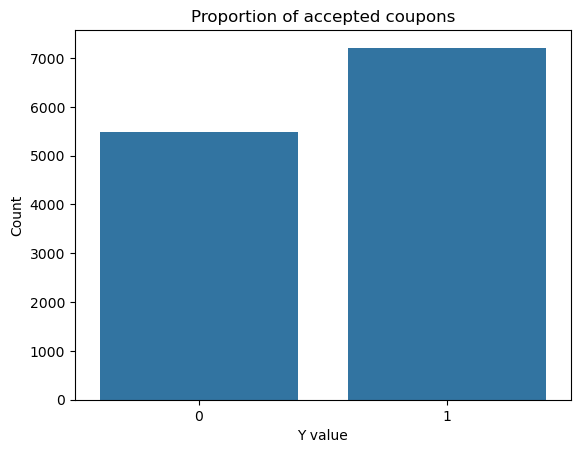

In [229]:
total = len(data)
accepted = len(data.query("Y == 1"))
print('Total:',total, 'Accepted: ',accepted, 'rate:', (accepted/total))

counts = data["Y"].value_counts().reset_index()
counts.columns = ["Y", "count"]

sns.barplot(data=counts, x="Y", y="count")
plt.title("Proportion of accepted coupons")
plt.xlabel("Y value")
plt.ylabel("Count")



About 57% of the coupons were accepted, showing a slight preference toward acceptance over rejection.

####  5. Use a bar plot to visualize the `coupon` column.

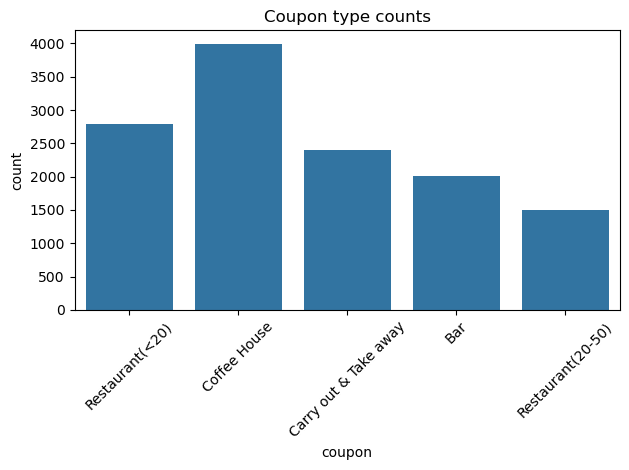

In [230]:

sns.countplot(data=data, x='coupon')
plt.xticks(rotation=45)
plt.title('Coupon type counts')
plt.tight_layout()

Coffee House coupons show up the most, while Bar coupons appear less often. This means the data is not evenly distributed, so some coupon types may influence the results more just because they appear more frequently.

#### 6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

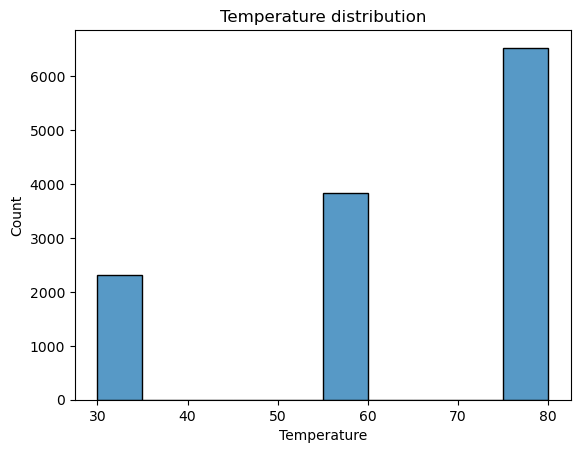

In [244]:
data['temperature'] = pd.to_numeric(data['temperature'])
sns.histplot(data['temperature'], bins=10)
plt.title('Temperature distribution')
plt.xlabel('Temperature')


From the temperature distribution, most observations are concentrated at higher temperatures, especially around the warm and hot ranges. There are fewer records at lower temperatures, which suggests that the data was collected mostly during warmer conditions.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [245]:
bar_df = data[data['coupon'].str.contains('Bar', na=False)]
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_num,income_std,income_min,income_max
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1,1,0,0,1,0,21,$37500 - $49999,37500,49999
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1,0,0,1,0,1,21,$37500 - $49999,37500,49999
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1,1,1,0,1,0,21,$37500 - $49999,37500,49999
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,0,0,0,1,1,21,$62500 - $74999,62500,74999
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,0,0,1,0,1,21,$62500 - $74999,62500,74999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1,1,0,0,1,0,26,$75000 - $87499,75000,87499
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1,1,0,0,1,0,26,$75000 - $87499,75000,87499
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1,1,0,0,1,0,26,$75000 - $87499,75000,87499
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1,1,0,0,1,0,26,$75000 - $87499,75000,87499


#### 2. What proportion of bar coupons were accepted?


In [252]:
print(f"Bar accept rate: {bar_df['Y'].mean():.2%}  |  count: {bar_df['Y'].count()}")

Bar accept rate: 41.00%  |  count: 2017


#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [255]:
low = bar_df[bar_df['Bar'].isin(['never','less1','1~3'])]
high = bar_df[bar_df['Bar'].isin(['4~8','gt8'])]
print(f"Low bar frequency accept rate: {low['Y'].mean():.2%}  |  n = {len(low)}")
print(f"High bar frequency accept rate: {high['Y'].mean():.2%}  |  n = {len(high)}")

Low bar frequency accept rate: 37.06%  |  n = 1797
High bar frequency accept rate: 76.88%  |  n = 199


#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [261]:
group = bar_df[bar_df['Bar'].isin(['4~8','gt8']) & (bar_df['age_num'] > 25)]
others = bar_df.drop(group.index)
print(f"Frequent bar visitors (>1/month) and age > 25:\n"
    f"  Acceptance rate = {group['Y'].mean():.2%}  |  n = {len(group)}\n")
print(f"All other drivers:\n"
    f"  Acceptance rate = {others['Y'].mean():.2%}  |  n = {len(others)}")

Frequent bar visitors (>1/month) and age > 25:
  Acceptance rate = 77.21%  |  n = 136

All other drivers:
  Acceptance rate = 38.38%  |  n = 1881


#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [263]:
exclude_occ_pattern = r'Farming|Fishing|Forestry'
not_FFF_group = bar_df[bar_df['Bar'].isin(['4~8','gt8']) & (bar_df['passanger'] != 'Kid(s)') & (~bar_df['occupation'].str.contains(exclude_occ_pattern))]
print(f"Frequent bar visitors (>1/month), no kids as passengers,\n"
    f"and occupations not in farming/fishing/forestry:\n"
    f"  Acceptance rate = {not_FFF_group['Y'].mean():.2%}  |  n = {len(not_FFF_group)}"
)


Frequent bar visitors (>1/month), no kids as passengers,
and occupations not in farming/fishing/forestry:
  Acceptance rate = 77.49%  |  n = 191


#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [264]:
# go to bars more than once a month, had passengers that were not a kid, 
# and were not widowed
groupA = data[
    data['Bar'].isin(['4~8','gt8']) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')
]

# B: age < 30 (extract numeric)
groupB = data[data['Bar'].isin(['4~8','gt8']) & (data['age_num'] < 30)]

# C: frequent cheap restaurants and income < 50k (extract income lower bound)
groupC = data[data['RestaurantLessThan20'].isin(['4~8', 'gt8']) & (data['income_min'] < 50000)]

print(
    f"A) Frequent bar visitors (>1/month), no kids, not widowed:\n"
    f"   Acceptance rate = {groupA['Y'].mean():.3f}  |  n = {len(groupA)}\n"
)

print(
    f"B) Frequent bar visitors (>1/month), age < 30:\n"
    f"   Acceptance rate = {groupB['Y'].mean():.3f}  |  n = {len(groupB)}\n"
)

print(
    f"C) Frequent cheap restaurant visitors (>4/month), income < $50K:\n"
    f"   Acceptance rate = {groupC['Y'].mean():.3f}  |  n = {len(groupC)}"
)


A) Frequent bar visitors (>1/month), no kids, not widowed:
   Acceptance rate = 0.622  |  n = 1385

B) Frequent bar visitors (>1/month), age < 30:
   Acceptance rate = 0.648  |  n = 964

C) Frequent cheap restaurant visitors (>4/month), income < $50K:
   Acceptance rate = 0.601  |  n = 2279


#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the results, I think drivers who accepted the bar coupons are more related to the situation of the trip than to only personal characteristics. The acceptance rate is relatively high for all groups, which suggests that many drivers are open to this type of offer.

Drivers seem more likely to accept the bar coupon when they are already in a leisure or social context, for example when they are not in a hurry or when they are traveling with friends instead of family. This makes sense because going to a bar usually requires free time and a relaxed plan.

In general, I believe that bar coupon acceptance is influenced more by trip purpose and context (time of day, destination, passengers) than by strict demographic factors. When the trip aligns with social activities, drivers are more willing to accept the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I analyzed what type of drivers are more likely to accept coffee house coupons, and compare this behavior with bar coupons.

In [265]:
coffee = data[data["coupon"] == "Coffee House"]
print(f"Coffee House coupon acceptance rate: {coffee['Y'].mean():.2%}  |  n = {len(coffee)}")

Coffee House coupon acceptance rate: 49.92%  |  n = 3996


Converts time categories into numeric hours so coffee coupon acceptance can be analyzed by time of day.

In [267]:
# set time to numeric hour
mapping = {'7AM': 7, '10AM': 10, '2PM': 14, '6PM': 18, '10PM': 22}
coffee = data.loc[data['coupon'] == 'Coffee House'].copy()  # avoid SettingWithCopyWarning
coffee['time_hour'] = coffee['time'].str.strip().map(mapping)
coffee['time_hour'] = pd.to_numeric(coffee['time_hour'], errors='coerce').astype('Int64')
coffee.groupby("time_hour")["Y"].mean().sort_index()


time_hour
7     0.445783
10    0.640712
14    0.547859
18    0.412626
22    0.424242
Name: Y, dtype: float64

Counts accepted coffee coupons per hour and plots them across the full 24-hour day to show when acceptances happen most often.

Text(0, 0.5, 'Number of Accepted Coupons')

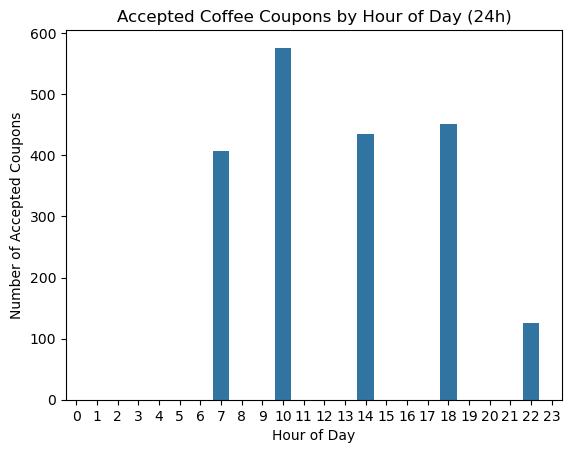

In [269]:
# Filter only accepted coupons
accepted = coffee[coffee["Y"] == 1]

accepted_per_hour = (
    accepted.groupby("time_hour")
    .size()
    .reindex(range(24), fill_value=0)
    .reset_index()
)

accepted_per_hour.columns = ["time_hour", "accepted_count"]

sns.barplot(
    data=accepted_per_hour,
    x="time_hour",
    y="accepted_count"
)

plt.title("Accepted Coffee Coupons by Hour of Day (24h)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accepted Coupons")


*Coffee coupons are mostly accepted during daytime hours, with very low acceptance at night.*

Combine several travel times indicator columns into a single, easier-to-use feature. The code groups the different “greater than or equal” time flags into one travel-time bucket, converts it into numeric minutes, and also creates an ordered category. This makes it simpler to analyze how coupon acceptance changes based on how far the coupon location is.

In [271]:
# Derive single travel-time feature from GEQ flags
geq_cols = ['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']
for c in geq_cols:
    if c not in data.columns:
        data[c] = 0
# build an object-dtype bucket to avoid mixed-type promotion issues
bucket = [None] * len(data)
bucket = np.array(bucket, dtype=object)
mask25 = data['toCoupon_GEQ25min'] == 1
mask15 = data['toCoupon_GEQ15min'] == 1
mask5  = data['toCoupon_GEQ5min'] == 1
bucket[mask25] = '>=25min'
bucket[mask15 & ~mask25] = '>=15min'
bucket[mask5 & ~mask15 & ~mask25] = '>=5min'
bucket[~(mask5|mask15|mask25)] = np.nan
data['coupon_travel_bucket'] = bucket
# numeric minutes and ordered categorical
def bucket_to_min(b):
    if pd.isna(b):
        return np.nan
    return {'>=5min':5,'>=15min':15,'>=25min':25}.get(b, np.nan)
data['coupon_travel_min'] = data['coupon_travel_bucket'].map(bucket_to_min)
data['coupon_travel_ord'] = pd.Categorical(data['coupon_travel_bucket'], categories=['>=5min','>=15min','>=25min'], ordered=True)
data[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','coupon_travel_bucket','coupon_travel_min']].sample(8)

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,coupon_travel_bucket,coupon_travel_min
792,1,1,0,>=15min,15
4187,1,1,0,>=15min,15
5696,1,1,0,>=15min,15
690,1,0,0,>=5min,5
9114,1,0,0,>=5min,5
961,1,0,0,>=5min,5
773,1,0,0,>=5min,5
11741,1,0,0,>=5min,5


Compare distributions for selected numeric columns by Y

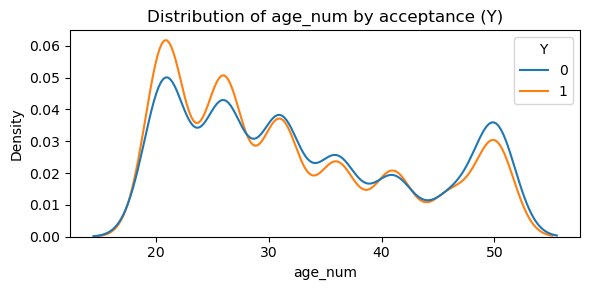

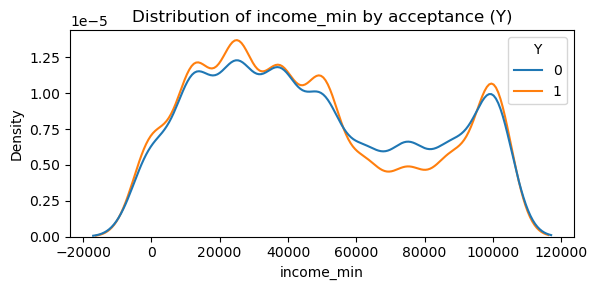

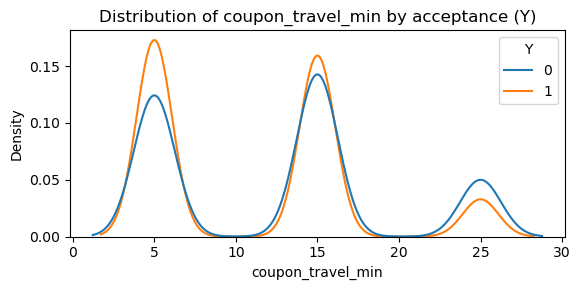

In [275]:
num_cols = ['age_num','income_min','coupon_travel_min']
for col in num_cols:
    if col in data.columns:
        plt.figure(figsize=(6,3))
        sns.kdeplot(data=data, x=col, hue='Y', common_norm=False)
        plt.title(f'Distribution of {col} by acceptance (Y)')
        plt.tight_layout()

*Acceptance does not change much by age or income, but shorter travel time clearly increases the chance of accepting a coupon.*

Analyze how coupon acceptance rates vary across different categorical features by calculating the percentage of accepted coupons for each category and visualizing the results.

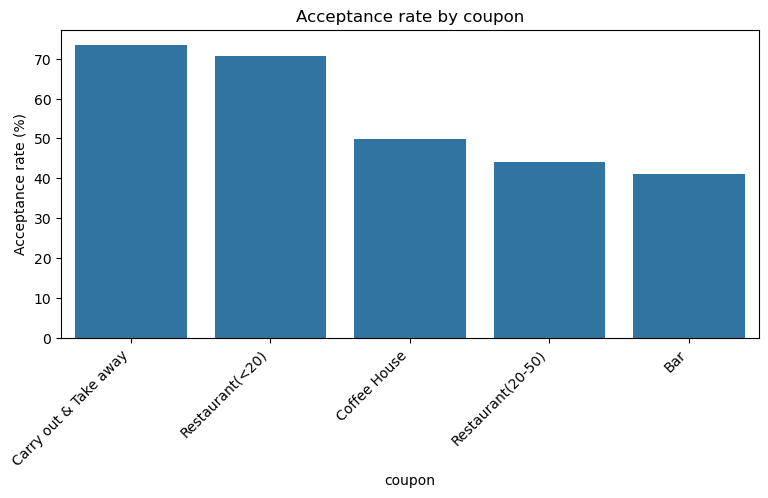

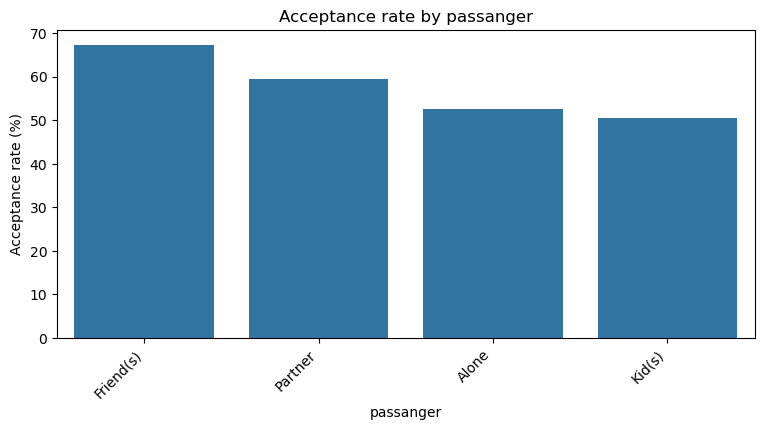

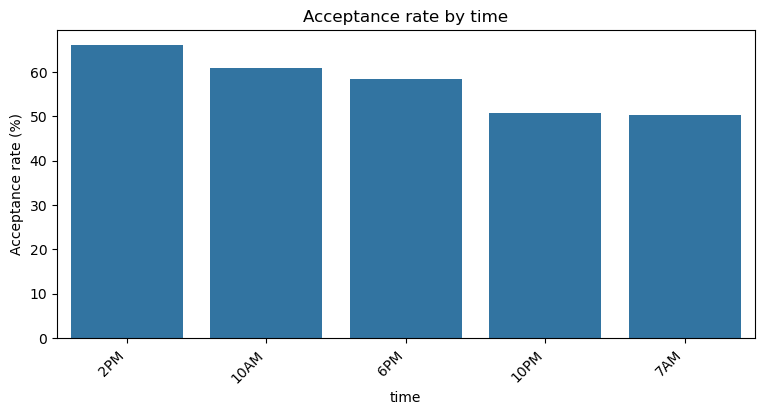

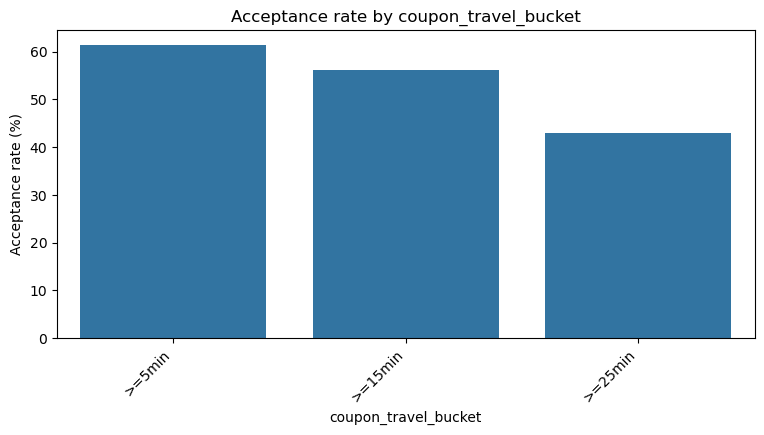

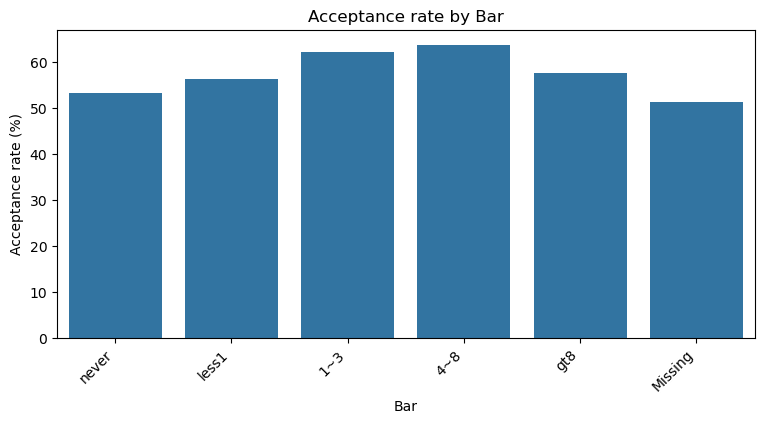

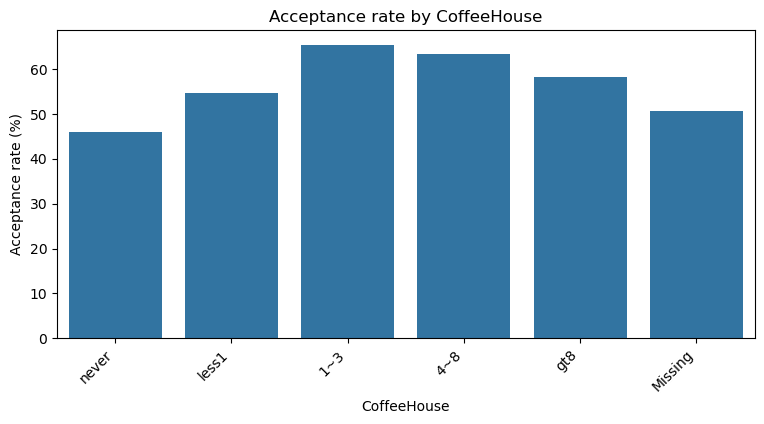

In [282]:
cat_cols = ['coupon','passanger','time','coupon_travel_bucket','Bar','CoffeeHouse']

for col in cat_cols:
    if col in data.columns:
        tmp = data[[col, 'Y']].copy()
        tmp[col] = tmp[col].fillna('Missing')

        rate = (
            tmp.groupby(col, observed=True)['Y']
            .mean()
            .mul(100)
            .reset_index(name='accept_rate_pct')
            .sort_values('accept_rate_pct', ascending=False)
        )

        plt.figure(figsize=(9, 4))
        sns.barplot(data=rate, x=col, y='accept_rate_pct')
        plt.title(f'Acceptance rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Acceptance rate (%)')
        plt.xticks(rotation=45, ha='right')

Coupon acceptance is highest for low-cost, convenient offers, social contexts, and shorter travel distances. Demographic context such as passengers and habitual behavior (bar or coffee frequency) shows meaningful variation, while travel distance emerges as one of the strongest predictors of acceptance.
